In [1]:
import torch
from PIL import Image
from loader.Dataloader import ImageDataLoader
from torchvision import transforms
from model.MainModel import PretrainedModel, CustomModel
from model.modules import ViT, Resnet, CustomCNN, Beit

/Users/dylansmall/Desktop/Spring 2023/Deep Learning/AIColorBalancing/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:

Image.open('data/images_224x224/2b444765.jpg')

loader = ImageDataLoader((224,224), space='RGB', batch_size=1, maxEpochSize=320)


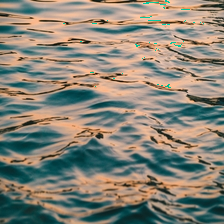

In [439]:
data = next(loader)
test = data[0].squeeze().to(torch.uint8)
im = transforms.ToPILImage()(test).convert("RGB")
display(im)
im.save('data_4.png','PNG')


In [54]:
model = PretrainedModel(ViT.ViTBuilder((224, 224)))
model.load_state_dict(torch.load('model_weights/ViT04-17-23-15-14-12_RGB_RGB.pth'))

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [440]:
out = model(data[0])
out

tensor([0.5091, 0.4365, 0.3839], grad_fn=<AddBackward0>)

In [441]:
data[1]

tensor([[0.5021, 0.4571, 0.4453]])

In [286]:
import cv2
import numpy as np

In [161]:
def reverse_transform(out_color, data): 
    out2= out_color.reshape(1,1,3).to(torch.float32).cpu().detach().numpy()
    #image = cv2.cvtColor(out2, cv2.COLOR_RGB2LAB).reshape(3)
    #print(image.dtype)
    scalar = out2.reshape(3) / (np.array([128,128,128]) / 255)
    scalar /= np.sum(scalar) / 3
    ya = data.squeeze().to(torch.float64).numpy()
    scalar = scalar[:,None, None]
    ya /= scalar
    return ya


(3, 224, 224)

In [132]:
ya

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[22.45648642, 21.00768084, 20.28327805, ..., 23.1808892 ,
         23.1808892 , 22.45648642],
        [20.28327805, 21.00768084, 21.00768084, ..., 22.45648642,
         22.45648642, 22.45648642],
        [20.28327805, 22.45648642, 21.00768084, ..., 22.45648642,
         20.28327805, 22.45648642],
        ...,
        [26.80290314, 26.80290314, 23.90529199, ..., 2

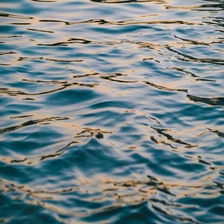

In [442]:
final = reverse_transform(out, data[0]).reshape(3,224,224).astype(np.uint8)

img = transforms.ToPILImage()(torch.tensor(final)).convert("RGB")
img.save('pred_y_4.png','PNG')
display(img)

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[22, 21, 20, ..., 23, 23, 22],
        [20, 21, 21, ..., 22, 22, 22],
        [20, 22, 21, ..., 22, 20, 22],
        ...,
        [27, 27, 24, ..., 24, 24, 24],
        [29, 26, 20, ..., 23, 23, 23],
        [27, 26, 19, ..., 23, 24, 25]],

       [[25, 24, 24, ..., 25, 26, 25],
        [23, 24, 25, ..., 24, 25, 25],
        [22, 25, 25, ..., 26, 24, 26],
        ...,
        [23, 23, 20, ..., 22, 22, 22],
        [23, 20, 16, ..., 21, 23, 23],
        [19, 20, 15, ..., 21, 24, 25]]], dtype=uint8)

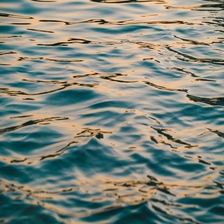

In [443]:
final = reverse_transform(data[1], data[0]).reshape(3,224,224).astype(np.uint8)

img = transforms.ToPILImage()(torch.tensor(final)).convert("RGB")
img.save('gt_y_4.png','PNG')
display(img)